In [57]:
import pandas as pd
from nptdms import TdmsFile
import matplotlib.pyplot as plt
import numpy as np
import time


def rename(df):
    df = df.rename(columns={
        "/'Untitled'/'Micr1'": 'Micr1',
        "/'Untitled'/'Acc1X'": 'Acc1X',
        "/'Untitled'/'Acc1Y'": 'Acc1Y',
        "/'Untitled'/'Acc1Z'": 'Acc1Z',
        "/'Untitled'/'Acc5X'": 'Acc5X',
        "/'Untitled'/'Acc5Y'": 'Acc5Y',
        "/'Untitled'/'Acc5Z'": 'Acc5Z',
        "/'Untitled'/'Acc1L'": 'Acc1L',
        "/'Untitled'/'Acc3X'": 'Acc3X',
        "/'Untitled'/'Acc3Y'": 'Acc3Y',
        "/'Untitled'/'Acc3Z'": 'Acc3Z',
        "/'Untitled'/'Acc3L'": 'Acc3L',
        "/'Untitled'/'Acc5L'": 'Acc5L',
        "/'Untitled'/'Acc2L'": 'Acc2L',
        "/'Untitled'/'Acc4L'": 'Acc4L',
        "/'Untitled'/'Mems3'": 'Mems3',
        "/'Untitled'/'Curr1'": 'Curr1',
        "/'Untitled'/'Curr2'": 'Curr2',
        "/'Untitled'/'Curr3'": 'Curr3',
        "/'Untitled'/'Mems5X'": 'Mems5X',
        "/'Untitled'/'Mems5Y'": 'Mems5Y',
        "/'Untitled'/'Mems5Z'": 'Mems5Z',
        "/'Untitled'/'SlowShaftTrigger'": 'SlowShaftTrigger'
    })
    return df

def createPandasDF(df):
    df = df.dropna()
    df = rename(df)
    df = df.drop(df.columns[-1], axis=1)
    return df

def toBinned(df):

    bin_size = 440
    
    # Initialize an empty dictionary to store binning results for each column
    binned_data = {}
    
    # Iterate over all columns to bin
    for col in df.columns:
        # Perform binning by grouping by bin_size
        binned_col = df[col].groupby(df.index // bin_size)
        
        # Calculate statistics for each bin
        binned_stats = binned_col.agg(['mean', 'skew', 'var'])
        
        # Rename resulting columns based on the column and metric used
        binned_stats.columns = [f'{col}_{stat}_binned' for stat in ['mean', 'skew', 'var']]
        
        # Add results to the dictionary
        binned_data[col] = binned_stats
    
    # Create a complete dataframe with all binned columns
    binned_df = pd.concat(binned_data.values(), axis=1)
    
    return binned_df
<

In [58]:
def df_from_path(file_paths):
    # Create an empty list for DataFrames
    df_out = []

    # Iterate over each TDMS file and create the corresponding DataFrame
    for file_path in file_paths:
        full_path = '/Belt_Tests/Data' + file_path  
        tdms_file = TdmsFile.read(full_path)
        df = tdms_file.as_dataframe()
        df = createPandasDF(df)
        df_out.append(df)
    df_output = pd.concat(df_out, ignore_index=True)
    return df_output

# List of TDMS files that I'm gonna use to train the model
file_paths_nom = [
    "/Nominal/04_data_Test01_0074_sampled.tdms",
    "/Nominal/08_data_Test05_0010_sampled.tdms",
    "/Nominal/15_data_Test12_0005_sampled.tdms",
    "/Nominal/16_data_Test26_0010_sampled.tdms",
    "/Nominal/data_Test01_0044_sampled.tdms",
    "/Nominal/data_Test05_0001_sampled.tdms",
    "/Nominal/data_Test13_0008_Nominal_sampled.tdms", 
    "/Nominal/data_Test40_0033_Nominal_sampled.tdms",
    "/Nominal/data_Test39_0005_sampled.tdms",
    "/Nominal/data_Test44_0011_sampled.tdms",
]

file_paths_Loops = [
    "/Loops/data_Test02_0004_sampled.tdms",
    "/Loops/data_Test03_0005_sampled.tdms",
    "/Loops/data_Test04_0006_sampled.tdms",
    "/Loops/data_Test08_0005_sampled.tdms",
    "/Loops/data_Test08_0006_sampled.tdms",
    "/Loops/data_Test11_0007_sampled.tdms",
    "/Loops/data_Test15_0008_sampled.tdms",
    "/Loops/data_Test19_0008_sampled.tdms",
    "/Loops/data_Test21_0002_sampled.tdms",
    
]

file_paths_chain = [
    "/chain/data_Test41_0003_cat1_sampled.tdms",
    "/chain/data_Test41_0009_chain_1mm_sampled.tdms",
    "/chain/data_Test42_0004_chain_2mm_sampled.tdms",
    "/chain/data_Test43_0002_cat5_sampled.tdms",
]

file_paths_Ties = [
    "/Ties/data_Test27_0001_sampled.tdms",
    "/Ties/data_Test27_0009_sampled.tdms",
    "/Ties/data_Test28_0002_sampled.tdms",
    "/Ties/data_Test29_0003_sampled.tdms",
    "/Ties/data_Test30_0004_sampled.tdms",
    "/Ties/data_Test31_0003_sampled.tdms",
    "/Ties/data_Test31_0008_sampled.tdms",
    "/Ties/data_Test32_0006_sampled.tdms",
    "/Ties/data_Test32_0008_sampled.tdms",
    "/Ties/data_Test33_0001_sampled.tdms",
    "/Ties/data_Test33_0002_sampled.tdms",
    "/Ties/data_Test34_0008_sampled.tdms",
    "/Ties/data_Test35_0009_sampled.tdms",
    "/Ties/data_Test36_0009_sampled.tdms",
    "/Ties/data_Test37_0003_sampled.tdms",
]


In [61]:
def addError(df, error):
    if error:
        df['Error'] = 1
    else: df['Error'] = 0
    return df

binned_nom = addError(binned_nom, error = False)
binned_nom

,Micr1_mean_binned,Micr1_skew_binned,Micr1_var_binned,Acc1X_mean_binned,Acc1X_skew_binned,Acc1X_var_binned,Acc1Y_mean_binned,Acc1Y_skew_binned,Acc1Y_var_binned,Acc1Z_mean_binned,...,Mems5X_mean_binned,Mems5X_skew_binned,Mems5X_var_binned,Mems5Y_mean_binned,Mems5Y_skew_binned,Mems5Y_var_binned,Mems5Z_mean_binned,Mems5Z_skew_binned,Mems5Z_var_binned,Error
0,-0.004816,0.051653,4.143655,0.056115,-0.267702,0.719684,0.001682,0.450708,7.264728,0.009020,...,1.602516,0.070839,0.001780,1.653408,0.209117,0.001568,1.687857,0.680014,0.002475,0
1,0.057922,0.221297,3.347931,0.054229,-0.145160,1.087754,-0.019580,-0.138556,9.608789,0.022354,...,1.600227,0.104360,0.002110,1.653089,-0.114436,0.001484,1.685153,0.473613,0.002309,0
2,0.061762,-0.011147,3.545638,0.054216,0.201121,0.737336,0.048800,-0.420234,4.609882,0.014063,...,1.603398,0.242082,0.001713,1.656134,-0.279470,0.001528,1.694615,0.122532,0.002174,0
3,0.070155,-0.083714,4.332263,0.056790,-0.004932,0.700795,0.018749,-0.358628,8.233508,0.006768,...,1.597323,-0.274674,0.001587,1.649379,-0.084064,0.001402,1.680295,0.248782,0.002342,0
4,0.092257,-0.081737,3.935596,0.057864,-0.264635,0.832335,-0.013152,0.149603,6.612272,0.012578,...,1.602242,-0.207498,0.002128,1.653789,-0.051933,0.001448,1.688669,0.240088,0.002595,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13591,0.016955,-0.233231,3.873920,0.051487,0.542641,0.107814,0.009123,0.060354,0.427920,0.005417,...,1.601612,-0.148259,0.002985,1.654393,0.025492,0.001455,1.690077,0.463560,0.000840,0
13592,0.077480,-0.223205,3.153349,0.051085,1.167852,0.173936,-0.001711,0.402760,0.398374,0.009423,...,1.599533,0.019280,0.002219,1.652927,-0.052315,0.001291,1.686354,-0.533650,0.000561,0
13593,-0.077702,-0.080924,3.399556,0.048679,1.146388,0.128819,0.010956,0.398273,0.421253,0.009826,...,1.599072,-0.526936,0.002488,1.650784,0.033643,0.001022,1.688362,0.207752,0.000541,0
13594,0.120192,0.049215,3.579641,0.053425,1.324453,0.143296,-0.000412,0.325023,0.361554,0.009791,...,1.598608,-0.067712,0.001964,1.651221,-0.168833,0.001127,1.683202,0.355074,0.000586,0


In [62]:
df_Loops = df_from_path(file_paths_Loops)
binned_Loops = toBinned(df_Loops)
binned_Loops = addError(binned_Loops, True)
binned_Loops


,Micr1_mean_binned,Micr1_skew_binned,Micr1_var_binned,Acc1X_mean_binned,Acc1X_skew_binned,Acc1X_var_binned,Acc1Y_mean_binned,Acc1Y_skew_binned,Acc1Y_var_binned,Acc1Z_mean_binned,...,Mems5X_mean_binned,Mems5X_skew_binned,Mems5X_var_binned,Mems5Y_mean_binned,Mems5Y_skew_binned,Mems5Y_var_binned,Mems5Z_mean_binned,Mems5Z_skew_binned,Mems5Z_var_binned,Error
0,0.039860,0.260724,4.706093,0.053694,-0.271292,0.691831,-0.023625,0.172673,10.591408,0.014352,...,1.601358,-0.302343,0.002771,1.653378,0.076224,0.001744,1.688533,0.014945,0.002239,1
1,0.100509,0.011234,3.740771,0.056705,0.050916,0.776718,-0.006007,0.175929,5.368960,0.008356,...,1.598733,-0.013338,0.002465,1.649260,-0.404176,0.001647,1.677067,-0.773286,0.002861,1
2,0.125676,0.086384,3.808902,0.036548,-0.246531,0.681243,0.013566,-1.407874,6.971610,0.016725,...,1.603199,0.466075,0.003707,1.654955,0.348739,0.001830,1.685571,0.170734,0.003150,1
3,0.073148,-0.065823,4.054021,0.050837,-0.034002,0.789206,-0.022385,-0.396626,12.441143,0.007466,...,1.600504,-0.444762,0.002208,1.652346,-0.500514,0.001832,1.688497,0.688096,0.003553,1
4,0.086044,-0.194712,3.690872,0.023797,-0.387019,0.602147,-0.045134,-0.560969,6.483756,0.009978,...,1.599796,0.032363,0.002884,1.651805,-0.394939,0.001676,1.683843,-0.044187,0.002407,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10074,0.071338,-0.203698,3.488158,0.055842,-0.177130,1.067049,-0.043822,-1.705248,13.536578,0.018357,...,1.601230,-0.031184,0.001636,1.653557,0.262231,0.001064,1.686972,0.601782,0.000961,1
10075,0.144895,0.227099,3.833437,0.049719,-0.511364,1.021216,-0.037000,0.647790,6.832904,0.023186,...,1.601034,-0.267195,0.002383,1.653854,0.277704,0.001046,1.691034,0.121020,0.000786,1
10076,0.079902,-0.171158,3.268399,0.042027,-0.257071,0.969572,-0.031521,-2.299698,7.463726,0.014244,...,1.601289,-0.275520,0.001699,1.653671,0.298445,0.001054,1.687903,0.035176,0.000923,1
10077,-0.070812,-0.141906,4.212125,0.056143,-0.087976,1.038389,0.054346,-0.212898,8.063252,0.011776,...,1.600173,0.076654,0.001961,1.652775,-0.096902,0.001096,1.687477,-0.087302,0.000821,1


In [63]:
df_chain = df_from_path(file_paths_chain)
binned_chain = toBinned(df_chain)

binned_chain = addError(binned_chain,True)
binned_chain


,Micr1_mean_binned,Micr1_skew_binned,Micr1_var_binned,Acc1X_mean_binned,Acc1X_skew_binned,Acc1X_var_binned,Acc1Y_mean_binned,Acc1Y_skew_binned,Acc1Y_var_binned,Acc1Z_mean_binned,...,Mems5X_mean_binned,Mems5X_skew_binned,Mems5X_var_binned,Mems5Y_mean_binned,Mems5Y_skew_binned,Mems5Y_var_binned,Mems5Z_mean_binned,Mems5Z_skew_binned,Mems5Z_var_binned,Error
0,0.282968,-0.099220,4.851777,0.057467,0.305310,0.658663,0.001022,-0.536684,7.822519,0.005323,...,1.600208,-0.145158,0.001416,1.652317,0.019871,0.001027,1.687859,-0.108548,0.000654,1
1,0.036457,-0.019237,4.418999,0.055822,-0.322688,0.804084,0.058504,-0.785832,7.015734,0.005942,...,1.600957,-0.115857,0.001653,1.652176,-0.026760,0.000970,1.687318,-0.277947,0.000667,1
2,0.127639,-0.263540,4.611173,0.057327,-0.447360,0.776443,0.028063,-0.191459,6.277697,0.006142,...,1.601856,0.106595,0.001602,1.653518,0.210098,0.000882,1.690634,0.598526,0.000635,1
3,0.034751,-0.217223,4.337344,0.056728,0.077685,0.768511,0.008734,-2.163888,6.314896,0.013250,...,1.602779,0.019508,0.001971,1.655120,0.177063,0.001095,1.691121,0.586017,0.000692,1
4,0.037255,0.086760,3.894152,0.057945,0.192070,0.654635,0.019801,-0.237896,7.943280,0.007394,...,1.602378,-0.316713,0.001605,1.655561,0.474872,0.000800,1.691296,0.684549,0.000746,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5450,-0.284359,-0.088574,4.061698,0.052497,0.045380,0.479372,0.013760,-0.497558,4.948263,0.009546,...,1.597701,0.066036,0.011600,1.650055,-0.389553,0.002735,1.684819,-0.389115,0.000978,1
5451,-0.107525,-0.089702,3.217803,0.065066,0.195809,0.733915,0.017215,-1.602067,5.313265,-0.006119,...,1.596985,0.227336,0.008014,1.648808,-0.339506,0.001618,1.682290,-1.534207,0.001358,1
5452,0.066076,0.041339,3.894499,0.035315,0.290962,0.532020,0.009110,-0.431511,4.677065,0.009141,...,1.597144,0.099878,0.008580,1.648297,-0.287917,0.001842,1.682310,-1.161374,0.001448,1
5453,0.034673,-0.076594,4.120470,0.050225,0.464017,0.676202,0.016737,-0.289940,4.267791,0.020060,...,1.598374,0.010680,0.006516,1.650263,-0.398134,0.001984,1.682500,-1.644398,0.001283,1


In [64]:
df_Ties = df_from_path(file_paths_Ties)
binned_Ties = toBinned(df_Ties)
binned_Ties = addError(binned_Ties,True)
binned_Ties


,Micr1_mean_binned,Micr1_skew_binned,Micr1_var_binned,Acc1X_mean_binned,Acc1X_skew_binned,Acc1X_var_binned,Acc1Y_mean_binned,Acc1Y_skew_binned,Acc1Y_var_binned,Acc1Z_mean_binned,...,Mems5X_mean_binned,Mems5X_skew_binned,Mems5X_var_binned,Mems5Y_mean_binned,Mems5Y_skew_binned,Mems5Y_var_binned,Mems5Z_mean_binned,Mems5Z_skew_binned,Mems5Z_var_binned,Error
0,0.062414,-0.078449,4.126413,0.048955,-0.555460,0.690116,0.023976,0.818694,4.763477,0.000076,...,1.601555,0.183774,0.002136,1.653789,0.478826,0.001127,1.689122,0.329541,0.001175,1
1,0.110687,-0.086021,3.775968,0.051026,-0.325966,0.855414,0.051124,0.107473,6.397900,-0.002547,...,1.600916,-0.416563,0.001860,1.653227,0.016254,0.001198,1.686163,0.756277,0.001156,1
2,0.008493,-0.192808,3.335495,0.040967,-0.069768,0.905898,0.014258,-0.469051,8.483619,0.010821,...,1.601347,-0.322649,0.001775,1.652840,-0.113295,0.001120,1.688751,0.132748,0.001176,1
3,-0.052077,0.006833,4.272538,0.061560,-0.311287,0.760286,-0.034152,-0.370964,9.957160,0.013202,...,1.601555,-0.164132,0.001599,1.653702,0.212511,0.001142,1.685473,0.090679,0.001027,1
4,-0.136593,-0.031128,3.822389,0.040874,-0.043509,0.741322,-0.004266,0.544981,9.632688,0.011632,...,1.600993,-0.011339,0.002016,1.652681,-0.083367,0.001412,1.688502,0.042412,0.001036,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20450,-0.120196,-0.013659,3.546483,0.045707,-0.892035,0.846870,0.011761,-0.790011,4.553095,0.018357,...,1.601506,-0.140025,0.001507,1.653998,0.265479,0.000780,1.688502,0.676706,0.000390,1
20451,-0.204270,-0.078290,3.663386,0.047415,0.006660,0.721450,-0.015649,0.347861,7.223919,0.016105,...,1.600857,-0.073355,0.002287,1.654328,0.222200,0.000847,1.688481,-0.084744,0.000463,1
20452,0.097258,-0.005709,3.475474,0.046167,0.080302,0.838228,-0.013593,-1.292963,11.854933,0.010976,...,1.600876,0.110467,0.002068,1.653207,0.173113,0.000609,1.687209,-0.440460,0.000406,1
20453,0.205695,0.134289,3.781502,0.045732,-0.158313,0.606287,-0.011448,0.091116,5.726041,0.015507,...,1.600891,-0.269945,0.001712,1.654279,0.200055,0.000763,1.689279,0.157232,0.000431,1


#### Now I need to understand how to build the dataframe: 
- I can create a function that takes as input the various dataframes and specifies the size of each one, then concatenates them (example: concatenate_DF(binned_nom, dim_binNom, bin_cap, dim_binCap...) which returns a single dataframe. At this point, to change the data sizes, I just need to change dim_binNom.

- Once this is done, I will call the function that performs the train/test split.


In [65]:
def checkLength(df,dim):
    maxDim = len(df)
    if dim < 0:
        print("Error: the dimension of the dataframe cannot be negative!")
        return df, 0
    elif dim >= maxDim:
        return df, maxDim
    else: return df, dim
        
    
def concat_DF(binned_nom, dimNom, binned_Loops, dimLoops, binned_chain, dimchain, binned_Ties, dimTies):
    binned_nom, dimNom = checkLength(binned_nom, dimNom)
    binned_Loops, dimLoops = checkLength(binned_Loops, dimLoops)
    binned_chain, dimchain = checkLength(binned_chain, dimchain)
    binned_Ties, dimTies = checkLength(binned_Ties, dimTies)

    concatenated_df = pd.concat([binned_nom.head(dimNom), binned_Loops.head(dimLoops), binned_chain.head(dimchain), binned_Ties.head(dimTies)], axis=0)
    concatenated_df.reset_index(drop=True, inplace=True)
    
    return concatenated_df



# Try 1
## balancing: 40% nom 60% error 

In [66]:
# Set the parameters to have a balanced dataframe: notice that the chain has the lower number of binned data
dimNom = 10910       #Max = 13596
dimLoops = 5455    #Max = 10079
dimchain = 5455    #Max = 5455
dimTies = 5455  #Max = 20455
concatenated_DF = concat_DF(binned_nom, dimNom, binned_Loops, dimLoops, binned_chain, dimchain, binned_Ties, dimTies)
concatenated_DF


,Micr1_mean_binned,Micr1_skew_binned,Micr1_var_binned,Acc1X_mean_binned,Acc1X_skew_binned,Acc1X_var_binned,Acc1Y_mean_binned,Acc1Y_skew_binned,Acc1Y_var_binned,Acc1Z_mean_binned,...,Mems5X_mean_binned,Mems5X_skew_binned,Mems5X_var_binned,Mems5Y_mean_binned,Mems5Y_skew_binned,Mems5Y_var_binned,Mems5Z_mean_binned,Mems5Z_skew_binned,Mems5Z_var_binned,Error
0,-0.004816,0.051653,4.143655,0.056115,-0.267702,0.719684,0.001682,0.450708,7.264728,0.009020,...,1.602516,0.070839,0.001780,1.653408,0.209117,0.001568,1.687857,0.680014,0.002475,0
1,0.057922,0.221297,3.347931,0.054229,-0.145160,1.087754,-0.019580,-0.138556,9.608789,0.022354,...,1.600227,0.104360,0.002110,1.653089,-0.114436,0.001484,1.685153,0.473613,0.002309,0
2,0.061762,-0.011147,3.545638,0.054216,0.201121,0.737336,0.048800,-0.420234,4.609882,0.014063,...,1.603398,0.242082,0.001713,1.656134,-0.279470,0.001528,1.694615,0.122532,0.002174,0
3,0.070155,-0.083714,4.332263,0.056790,-0.004932,0.700795,0.018749,-0.358628,8.233508,0.006768,...,1.597323,-0.274674,0.001587,1.649379,-0.084064,0.001402,1.680295,0.248782,0.002342,0
4,0.092257,-0.081737,3.935596,0.057864,-0.264635,0.832335,-0.013152,0.149603,6.612272,0.012578,...,1.602242,-0.207498,0.002128,1.653789,-0.051933,0.001448,1.688669,0.240088,0.002595,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27270,-0.088561,-0.050293,3.880767,0.047692,-0.083482,0.778435,-0.009558,-0.083895,8.859986,0.015409,...,1.600639,-0.289951,0.001904,1.652978,0.147283,0.000962,1.684587,-0.273743,0.000955,1
27271,0.035052,-0.207756,3.611858,0.059682,-0.280832,0.760032,-0.065084,-1.998383,6.817476,0.024024,...,1.601002,-0.329920,0.001416,1.654437,-0.138285,0.000842,1.689195,-0.057024,0.001262,1
27272,0.042111,-0.091556,3.156732,0.055226,-0.121835,0.915014,-0.033919,0.846809,6.580590,0.015709,...,1.600183,-0.141061,0.001680,1.652987,0.286807,0.001072,1.685292,0.254773,0.000924,1
27273,0.163839,-0.280877,3.494311,0.060273,-0.057098,0.834963,-0.000071,-1.197625,6.261411,0.016223,...,1.600469,-0.218466,0.002051,1.652361,0.046112,0.001082,1.685626,0.085472,0.001008,1


In [67]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def printModel(y_pred):
    print("Accuracy:", accuracy_score(y_test, y_pred))

    # Print the classification report
    print(classification_report(y_test, y_pred))

    # Compute and print the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)

    # Display the confusion matrix as a heatmap
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


In [70]:
from sklearn.model_selection import train_test_split

#Separo la variabile target (Errore) dalle altre features del dataframe
X = concatenated_DF.drop('Error', axis=1)
y = concatenated_DF['Error']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state =1984)

In [89]:
from sklearn.ensemble import RandomForestClassifier

# Training of the model 
model = RandomForestClassifier(n_estimators=200, random_state=1984)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=1984)

Accuracy: 0.8392300641613198
              precision    recall  f1-score   support

           0       0.83      0.75      0.79      2192
           1       0.84      0.90      0.87      3263

    accuracy                           0.84      5455
   macro avg       0.84      0.82      0.83      5455
weighted avg       0.84      0.84      0.84      5455

Confusion Matrix:
[[1641  551]
 [ 326 2937]]


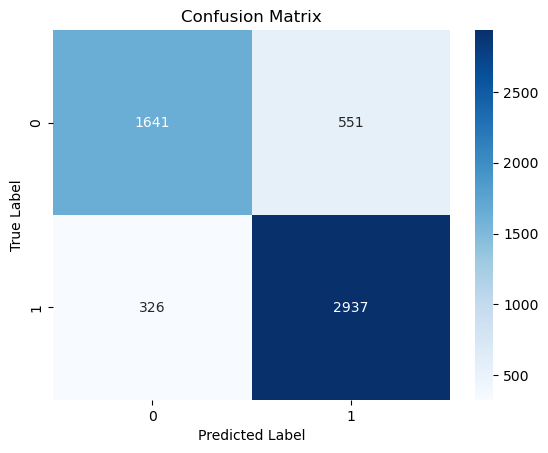

In [13]:
#Poi valuto il modello
y_pred = model.predict(X_test)
printModel(y_pred)

## Provo a modificare il RF
### n_estimators =1000 / 5000 / 10000

In [74]:
#Evaluate the model for n_est=1500
start_time = time.time()

model = RandomForestClassifier(n_estimators=1500, random_state=1984)
model.fit(X_train, y_train)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"The model took {elapsed_time/60: .3f} minutes to train.")


The model took  6.540 minutes to train.


Accuracy: 0.8403299725022915
              precision    recall  f1-score   support

           0       0.84      0.74      0.79      2192
           1       0.84      0.90      0.87      3263

    accuracy                           0.84      5455
   macro avg       0.84      0.82      0.83      5455
weighted avg       0.84      0.84      0.84      5455

Confusion Matrix:
[[1631  561]
 [ 310 2953]]


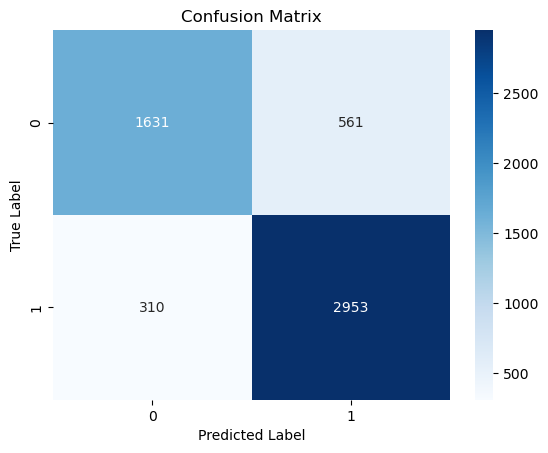

In [72]:
y_pred = model.predict(X_test)
printModel(y_pred)

In [77]:
start_time = time.time()

model = RandomForestClassifier(n_estimators=5000, random_state=1984)
model.fit(X_train, y_train)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"The model took {elapsed_time/60: .3f} minutes to train.")

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))



The model took  11.221 minutes to train.
Accuracy: 0.8384967919340055
              precision    recall  f1-score   support

           0       0.84      0.74      0.79      2192
           1       0.84      0.90      0.87      3263

    accuracy                           0.84      5455
   macro avg       0.84      0.82      0.83      5455
weighted avg       0.84      0.84      0.84      5455



In [79]:
start_time = time.time()

model = RandomForestClassifier(n_estimators=10000, random_state=1984)
model.fit(X_train, y_train)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"The model took {elapsed_time/60: .3f} minutes to train.")

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))



The model took  22.154 minutes to train.
Accuracy: 0.8397800183318057
              precision    recall  f1-score   support

           0       0.84      0.74      0.79      2192
           1       0.84      0.90      0.87      3263

    accuracy                           0.84      5455
   macro avg       0.84      0.82      0.83      5455
weighted avg       0.84      0.84      0.84      5455



## Trying adding parameters to the RF model:
### criterion = 'entropy' , min_samples_leaf = 3, min_samples_split = 5, max_depth = 60

In [80]:
start_time = time.time()

model = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', min_samples_leaf = 3, min_samples_split = 5, max_depth = 60, random_state=1984 )
model.fit(X_train, y_train)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"The model took {elapsed_time/60: .3f} minutes to train.")

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


The model took  0.522 minutes to train.
Accuracy: 0.8331805682859762
              precision    recall  f1-score   support

           0       0.83      0.74      0.78      2192
           1       0.84      0.90      0.87      3263

    accuracy                           0.83      5455
   macro avg       0.83      0.82      0.82      5455
weighted avg       0.83      0.83      0.83      5455



In [81]:
start_time = time.time()

model = RandomForestClassifier(n_estimators = 1500, criterion = 'entropy', min_samples_leaf = 3, min_samples_split = 5, max_depth = 60, random_state=1984 )
model.fit(X_train, y_train)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"The model took {elapsed_time/60: .3f} minutes to train.")

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

The model took  3.817 minutes to train.
Accuracy: 0.8395967002749771
              precision    recall  f1-score   support

           0       0.83      0.75      0.79      2192
           1       0.84      0.90      0.87      3263

    accuracy                           0.84      5455
   macro avg       0.84      0.82      0.83      5455
weighted avg       0.84      0.84      0.84      5455



## Trying with only one error class
#### Loops

In [83]:
dimNom = 10910       #Max = 13596
dimLoops = 5000  #Max = 10079
dimchain = 0    #Max = 5455
dimTies = 0  #Max = 20455
concatenated_DF = concat_DF(binned_nom, dimNom, binned_Loops, dimLoops, binned_chain, dimchain, binned_Ties, dimTies)
concatenated_DF

,Micr1_mean_binned,Micr1_skew_binned,Micr1_var_binned,Acc1X_mean_binned,Acc1X_skew_binned,Acc1X_var_binned,Acc1Y_mean_binned,Acc1Y_skew_binned,Acc1Y_var_binned,Acc1Z_mean_binned,...,Mems5X_mean_binned,Mems5X_skew_binned,Mems5X_var_binned,Mems5Y_mean_binned,Mems5Y_skew_binned,Mems5Y_var_binned,Mems5Z_mean_binned,Mems5Z_skew_binned,Mems5Z_var_binned,Error
0,-0.004816,0.051653,4.143655,0.056115,-0.267702,0.719684,0.001682,0.450708,7.264728,0.009020,...,1.602516,0.070839,0.001780,1.653408,0.209117,0.001568,1.687857,0.680014,0.002475,0
1,0.057922,0.221297,3.347931,0.054229,-0.145160,1.087754,-0.019580,-0.138556,9.608789,0.022354,...,1.600227,0.104360,0.002110,1.653089,-0.114436,0.001484,1.685153,0.473613,0.002309,0
2,0.061762,-0.011147,3.545638,0.054216,0.201121,0.737336,0.048800,-0.420234,4.609882,0.014063,...,1.603398,0.242082,0.001713,1.656134,-0.279470,0.001528,1.694615,0.122532,0.002174,0
3,0.070155,-0.083714,4.332263,0.056790,-0.004932,0.700795,0.018749,-0.358628,8.233508,0.006768,...,1.597323,-0.274674,0.001587,1.649379,-0.084064,0.001402,1.680295,0.248782,0.002342,0
4,0.092257,-0.081737,3.935596,0.057864,-0.264635,0.832335,-0.013152,0.149603,6.612272,0.012578,...,1.602242,-0.207498,0.002128,1.653789,-0.051933,0.001448,1.688669,0.240088,0.002595,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15905,-0.338691,0.123294,4.702595,0.047120,-0.346537,0.765379,0.016011,0.532257,8.466991,0.014076,...,1.601786,-0.007160,0.002017,1.654499,0.113944,0.001572,1.686674,-0.394178,0.002267,1
15906,0.091545,0.041762,2.866553,0.048604,0.575039,1.172082,0.004488,-0.283056,8.900477,0.011999,...,1.600865,-0.400114,0.001990,1.653351,0.478649,0.001718,1.686535,-0.049386,0.002247,1
15907,-0.143199,-0.117887,4.361540,0.048051,0.215003,0.751927,-0.004719,1.089540,4.844378,0.010812,...,1.602393,0.104072,0.001821,1.654331,0.269511,0.001425,1.690127,0.407809,0.002143,1
15908,-0.201354,-0.632229,4.160959,0.052148,-0.361093,0.971843,0.015155,-0.400555,8.435850,0.012060,...,1.601333,0.025027,0.002273,1.653176,0.265700,0.001482,1.689896,0.458753,0.001964,1


In [84]:
#Separate target variable (Error) from other features of the dataframe
X = concatenated_DF.drop('Error', axis=1)
y = concatenated_DF['Error']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state =1984)

The model took  10.604 minutes to train.
Accuracy: 0.9208677054689887
              precision    recall  f1-score   support

           0       0.99      0.89      0.94      2204
           1       0.81      0.98      0.89      1069

    accuracy                           0.92      3273
   macro avg       0.90      0.94      0.91      3273
weighted avg       0.93      0.92      0.92      3273

Confusion Matrix:
[[1964  240]
 [  19 1050]]


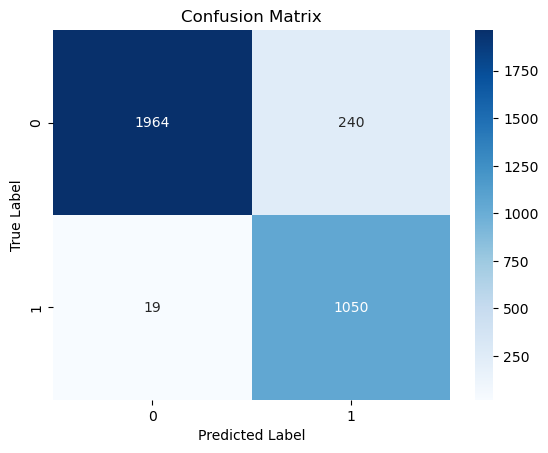

In [154]:
start_time = time.time()

model = RandomForestClassifier(n_estimators = 2000, criterion = 'entropy', min_samples_leaf = 3, min_samples_split = 5, max_depth = 60, random_state=1984 )
model.fit(X_train, y_train)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"The model took {elapsed_time/60: .3f} minutes to train.")

y_pred = model.predict(X_test)
printModel(y_pred)

In [147]:
dimNom = 10910       #Max = 13596
dimLoops = 0  #Max = 10079
dimchain = 5455    #Max = 5455
dimTies = 0  #Max = 20455
concatenated_DF = concat_DF(binned_nom, dimNom, binned_Loops, dimLoops, binned_chain, dimchain, binned_Ties, dimTies)

X = concatenated_DF.drop('Error', axis=1)
y = concatenated_DF['Error']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state =1984)

The model took  3.123 minutes to train.
Accuracy: 0.9208677054689887
              precision    recall  f1-score   support

           0       0.99      0.89      0.94      2204
           1       0.81      0.98      0.89      1069

    accuracy                           0.92      3273
   macro avg       0.90      0.94      0.91      3273
weighted avg       0.93      0.92      0.92      3273

Confusion Matrix:
[[1964  240]
 [  19 1050]]


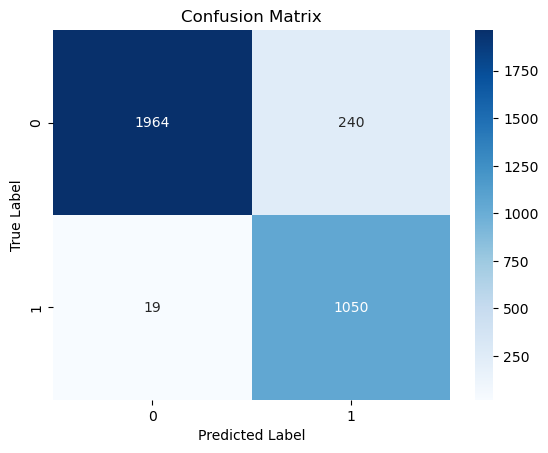

In [153]:
start_time = time.time()

model = RandomForestClassifier(n_estimators = 2000, criterion = 'entropy', min_samples_leaf = 3, min_samples_split = 5, max_depth = 60, random_state=1984 )
model.fit(X_train, y_train)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"The model took {elapsed_time/60: .3f} minutes to train.")

y_pred = model.predict(X_test)
printModel(y_pred)

#### try only Ties 

The model took  55.351 minutes to train.
Accuracy: 0.9208677054689887
              precision    recall  f1-score   support

           0       0.99      0.89      0.94      2204
           1       0.81      0.98      0.89      1069

    accuracy                           0.92      3273
   macro avg       0.90      0.94      0.91      3273
weighted avg       0.93      0.92      0.92      3273

Confusion Matrix:
[[1964  240]
 [  19 1050]]


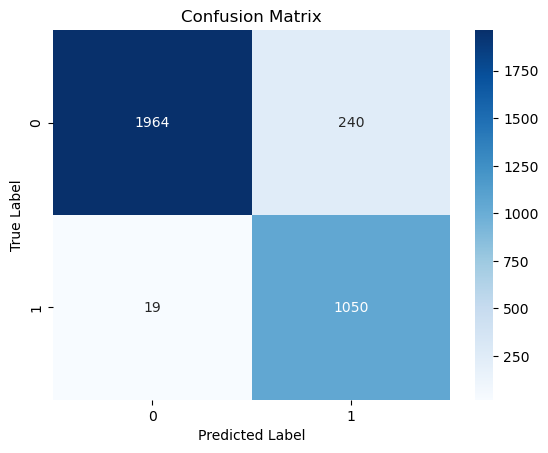

In [152]:
dimNom = 10910       #Max = 13596
dimLoops = 0  #Max = 10079
dimchain = 0    #Max = 5455
dimTies = 5455  #Max = 20455
concatenated_DF = concat_DF(binned_nom, dimNom, binned_Loops, dimLoops, binned_chain, dimchain, binned_Ties, dimTies)

X = concatenated_DF.drop('Error', axis=1)
y = concatenated_DF['Error']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state =1984)

start_time = time.time()

model = RandomForestClassifier(n_estimators = 2000, criterion = 'entropy', min_samples_leaf = 3, min_samples_split = 5, max_depth = 60, random_state=1984 )
model.fit(X_train, y_train)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"The model took {elapsed_time/60: .3f} minutes to train.")

y_pred = model.predict(X_test)
printModel(y_pred)

### try with 50% nom and 50% Loops

The model took  7.584 minutes to train.
Accuracy: 0.8455508474576271
              precision    recall  f1-score   support

           0       0.88      0.84      0.86      2670
           1       0.80      0.86      0.83      2050

    accuracy                           0.85      4720
   macro avg       0.84      0.85      0.84      4720
weighted avg       0.85      0.85      0.85      4720

Confusion Matrix:
[[2234  436]
 [ 293 1757]]


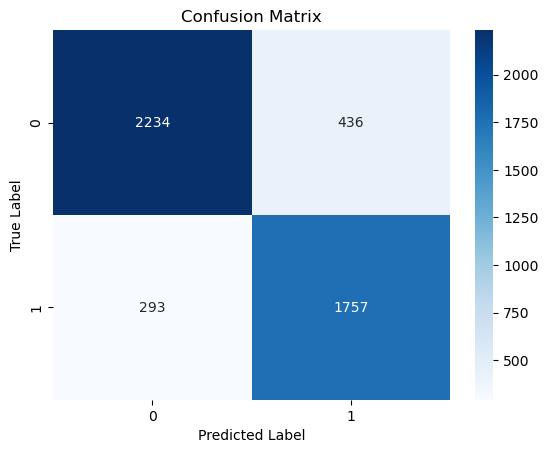

In [151]:
dimNom = 20000       #Max = 13596
dimLoops = 10000  #Max = 10079
dimchain = 0    #Max = 5455
dimTies = 0  #Max = 20455
concatenated_DF = concat_DF(binned_nom, dimNom, binned_Loops, dimLoops, binned_chain, dimchain, binned_Ties, dimTies)

X = concatenated_DF.drop('Error', axis=1)
y = concatenated_DF['Error']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state =1984)

start_time = time.time()

model = RandomForestClassifier(n_estimators = 2000, criterion = 'entropy', min_samples_leaf = 3, min_samples_split = 5, max_depth = 60, random_state=1984 )
model.fit(X_train, y_train)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"The model took {elapsed_time/60: .3f} minutes to train.")

y_pred = model.predict(X_test)
printModel(y_pred)

In [150]:
dimNom = 5455       #Max = 13596
dimLoops = 0  #Max = 10079
dimchain = 5455    #Max = 5455
dimTies = 0  #Max = 20455
concatenated_DF = concat_DF(binned_nom, dimNom, binned_Loops, dimLoops, binned_chain, dimchain, binned_Ties, dimTies)

X = concatenated_DF.drop('Error', axis=1)
y = concatenated_DF['Error']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state =1984)

start_time = time.time()

model = RandomForestClassifier(n_estimators = 2000, criterion = 'entropy', min_samples_leaf = 3, min_samples_split = 5, max_depth = 60, random_state=1984 )
model.fit(X_train, y_train)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"The model took {elapsed_time/60: .3f} minutes to train.")

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

The model took  1.052 minutes to train.
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1082
           1       1.00      1.00      1.00      1100

    accuracy                           1.00      2182
   macro avg       1.00      1.00      1.00      2182
weighted avg       1.00      1.00      1.00      2182



The model took  4.029 minutes to train.
Accuracy: 0.9461298032726604
              precision    recall  f1-score   support

           0       1.00      0.89      0.94      2718
           1       0.90      1.00      0.95      2721

    accuracy                           0.95      5439
   macro avg       0.95      0.95      0.95      5439
weighted avg       0.95      0.95      0.95      5439

Confusion Matrix:
[[2432  286]
 [   7 2714]]


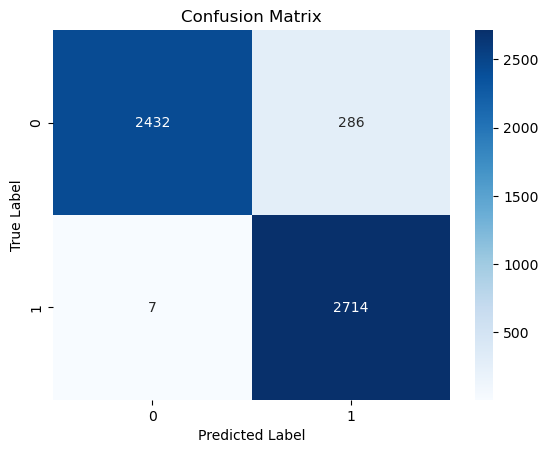

In [161]:
dimNom =13596      #Max = 13596
dimLoops = 0  #Max = 10079
dimchain = 0    #Max = 5455
dimTies = 13596  #Max = 20455
concatenated_DF = concat_DF(binned_nom, dimNom, binned_Loops, dimLoops, binned_chain, dimchain, binned_Ties, dimTies)

X = concatenated_DF.drop('Error', axis=1)
y = concatenated_DF['Error']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state =1984)

start_time = time.time()

model = RandomForestClassifier(n_estimators = 2000, criterion = 'entropy', min_samples_leaf = 3, min_samples_split = 5, max_depth = 60, random_state=1984 )
model.fit(X_train, y_train)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"The model took {elapsed_time/60: .3f} minutes to train.")

y_pred = model.predict(X_test)
printModel(y_pred)

# 40% balanced DF 

The model took  4.630 minutes to train.
Accuracy: 0.8282
              precision    recall  f1-score   support

           0       0.80      0.75      0.78      1994
           1       0.84      0.88      0.86      3006

    accuracy                           0.83      5000
   macro avg       0.82      0.82      0.82      5000
weighted avg       0.83      0.83      0.83      5000

Confusion Matrix:
[[1504  490]
 [ 369 2637]]


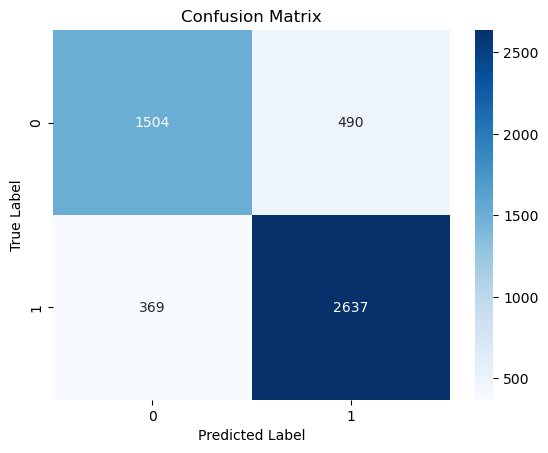

In [162]:
dimNom = 10000       #Max = 13596
dimLoops = 5000  #Max = 10079
dimchain = 5000    #Max = 5455
dimTies = 5000  #Max = 20455
concatenated_DF = concat_DF(binned_nom, dimNom, binned_Loops, dimLoops, binned_chain, dimchain, binned_Ties, dimTies)

X = concatenated_DF.drop('Error', axis=1)
y = concatenated_DF['Error']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state =1984)

start_time = time.time()

model = RandomForestClassifier(n_estimators = 2000, criterion = 'entropy', min_samples_leaf = 3, min_samples_split = 5, max_depth = 60, random_state=1984 )
model.fit(X_train, y_train)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"The model took {elapsed_time/60: .3f} minutes to train.")

y_pred = model.predict(X_test)
printModel(y_pred)

## Repeat with
min_samples_leaf = 5 
min_samples_split = 5
max_depth = 40

The model took  4.169 minutes to train.
Accuracy: 0.82784
              precision    recall  f1-score   support

           0       0.81      0.75      0.78      2517
           1       0.84      0.88      0.86      3733

    accuracy                           0.83      6250
   macro avg       0.82      0.82      0.82      6250
weighted avg       0.83      0.83      0.83      6250

Confusion Matrix:
[[1896  621]
 [ 455 3278]]


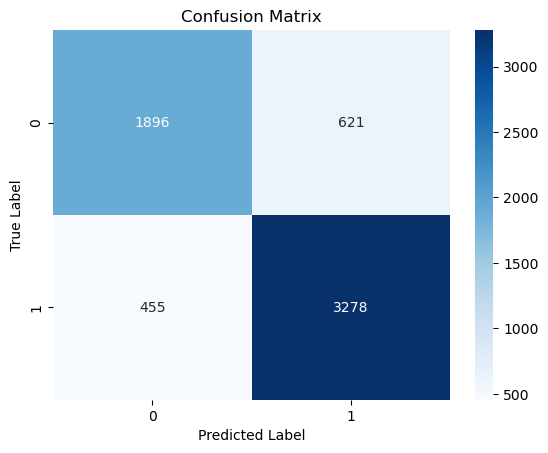

In [164]:
dimNom = 10000       #Max = 13596
dimLoops = 5000  #Max = 10079
dimchain = 5000    #Max = 5455
dimTies = 5000  #Max = 20455
concatenated_DF = concat_DF(binned_nom, dimNom, binned_Loops, dimLoops, binned_chain, dimchain, binned_Ties, dimTies)

X = concatenated_DF.drop('Error', axis=1)
y = concatenated_DF['Error']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state =1984)

start_time = time.time()

model = RandomForestClassifier(n_estimators = 2000, criterion = 'entropy', min_samples_leaf = 5, min_samples_split = 5, max_depth = 40, random_state=1984 )
model.fit(X_train, y_train)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"The model took {elapsed_time/60: .3f} minutes to train.")

y_pred = model.predict(X_test)
printModel(y_pred)

The model took  0.157 minutes to train.
Accuracy: 0.84144
              precision    recall  f1-score   support

           0       0.82      0.78      0.80      2517
           1       0.86      0.88      0.87      3733

    accuracy                           0.84      6250
   macro avg       0.84      0.83      0.83      6250
weighted avg       0.84      0.84      0.84      6250

Confusion Matrix:
[[1970  547]
 [ 444 3289]]


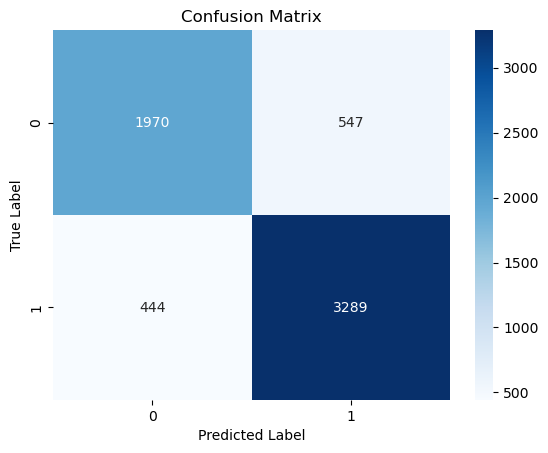

In [165]:
from xgboost import XGBClassifier

start_time = time.time()

xgb_model = XGBClassifier(n_estimators=2000, learning_rate=0.05)
xgb_model.fit(X_train, y_train)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"The model took {elapsed_time/60: .3f} minutes to train.")

y_pred = xgb_model.predict(X_test)
printModel(y_pred)

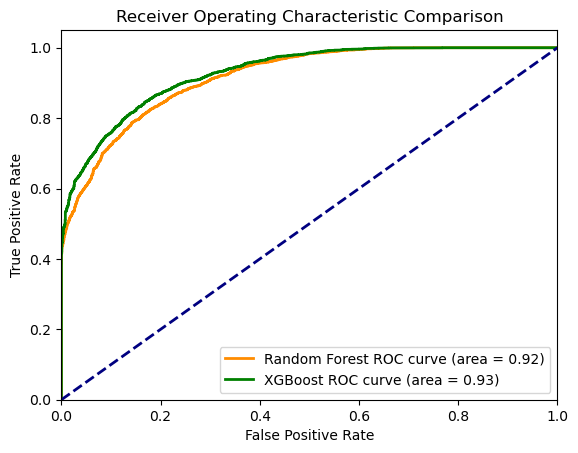

In [166]:
# Calculate the ROC metrics for both models
fpr_rf, tpr_rf, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_model.predict_proba(X_test)[:, 1])
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Create a graph to compare ROC curves
plt.figure()
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='Random Forest ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot(fpr_xgb, tpr_xgb, color='green', lw=2, label='XGBoost ROC curve (area = %0.2f)' % roc_auc_xgb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Comparison')
plt.legend(loc="lower right")
plt.show()


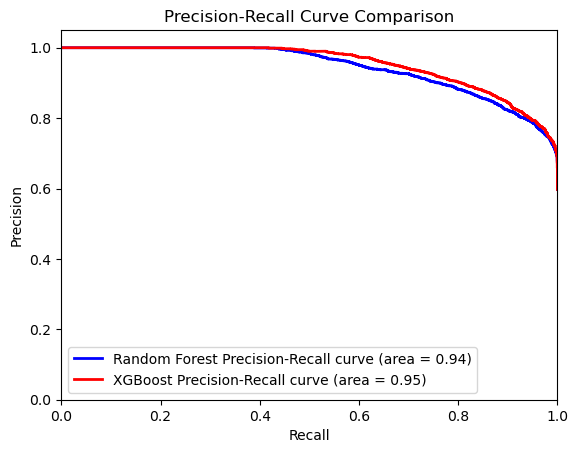

In [167]:
# Calcolate Precision and Recall for both models
precision_rf, recall_rf, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])
auc_precision_recall_rf = auc(recall_rf, precision_rf)

precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, xgb_model.predict_proba(X_test)[:, 1])
auc_precision_recall_xgb = auc(recall_xgb, precision_xgb)

# Create a graph to compare Precision-Recall curves
plt.figure()
plt.plot(recall_rf, precision_rf, color='blue', lw=2, label='Random Forest Precision-Recall curve (area = %0.2f)' % auc_precision_recall_rf)
plt.plot(recall_xgb, precision_xgb, color='red', lw=2, label='XGBoost Precision-Recall curve (area = %0.2f)' % auc_precision_recall_xgb)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve Comparison')
plt.legend(loc="lower left")
plt.show()

The model took  0.184 minutes to train.
Accuracy: 0.67904
              precision    recall  f1-score   support

           0       0.70      0.35      0.47      2517
           1       0.67      0.90      0.77      3733

    accuracy                           0.68      6250
   macro avg       0.69      0.63      0.62      6250
weighted avg       0.69      0.68      0.65      6250

Confusion Matrix:
[[ 881 1636]
 [ 370 3363]]


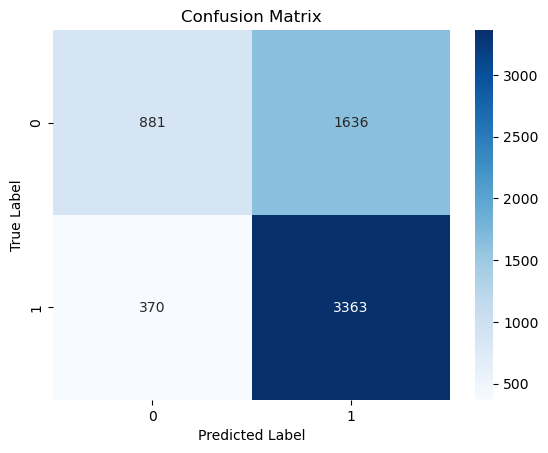

In [170]:
from sklearn.svm import SVC

start_time = time.time()

svm_model = SVC(kernel='rbf')
svm_model.fit(X_train, y_train)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"The model took {elapsed_time/60: .3f} minutes to train.")

y_pred = svm_model.predict(X_test)
printModel(y_pred)

Epoch 1/10
586/586 [==============================] - 0s 418us/step - loss: 0.5797 - accuracy: 0.6590
Epoch 2/10
586/586 [==============================] - 0s 424us/step - loss: 0.5334 - accuracy: 0.6909
Epoch 3/10
586/586 [==============================] - 0s 425us/step - loss: 0.5103 - accuracy: 0.7083
Epoch 4/10
586/586 [==============================] - 0s 425us/step - loss: 0.4959 - accuracy: 0.7175
Epoch 5/10
586/586 [==============================] - 0s 424us/step - loss: 0.4815 - accuracy: 0.7299
Epoch 6/10
586/586 [==============================] - 0s 426us/step - loss: 0.4742 - accuracy: 0.7377
Epoch 7/10
586/586 [==============================] - 0s 424us/step - loss: 0.4655 - accuracy: 0.7417
Epoch 8/10
586/586 [==============================] - 0s 424us/step - loss: 0.4570 - accuracy: 0.7484
Epoch 9/10
586/586 [==============================] - 0s 425us/step - loss: 0.4532 - accuracy: 0.7541
Epoch 10/10
586/586 [==============================] - 0s 423us/step - loss: 0.446

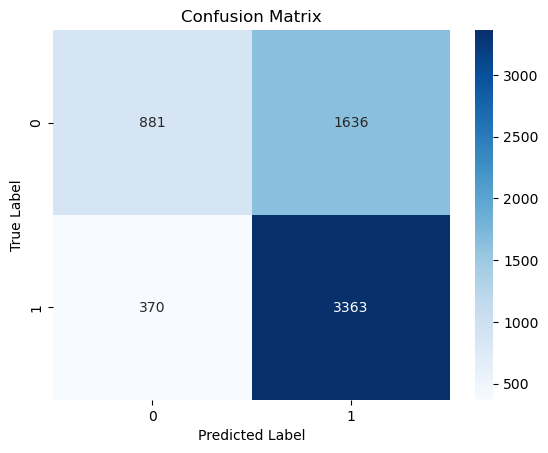

In [171]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

nn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

start_time = time.time()

nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
nn_model.fit(X_train, y_train, epochs=10, batch_size=32)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"The model took {elapsed_time/60: .3f} minutes to train.")

y_pred = svm_model.predict(X_test)
printModel(y_pred)